Soit $c > 0$ fixée, soient $L>0$ et $T>0$. On considère le problème aux limites suivant, d'inconnue $u$ :
$$
    \tag{$\ast$}
    \begin{cases}
        u_t + c u_x = 0   & \; \forall x \in ] 0, L [, \forall t \in ] 0, T [, \\
        u(x=0,t) = e^{-t} & \; \forall t \in ] 0, T [ , \\
        u(x,t=0) = 0      & \; \forall x \in ] 0, L [.
    \end{cases}
$$

Cette équation représente le transport d'une quantité scalaire $u$ à la vitesse $c$.
On a imposé une condition aux limites à gauche de Dirichlet inhomogène.
De plus, on a supposé que la condition initiale était identiquement nulle.

Dans les applications, on pourra prendre $c = 1$, $L = 1$ et $T = 0.5$.

**Question 1.** En utilisant la méthode des caractéristiques, montrer que la solution exacte du problème $(\ast)$ est :
$$
    u(x,t) = 
    \begin{cases}
        0 \vphantom{\dfrac 1 2}& \text{si } x > ct, \\
        \exp \left( -t + \dfrac x c \right) & \text{sinon.}
    \end{cases}
$$

**Réponse 1.** On utilise la méthode des caractéristiques vue en classe. Elle nous informe que les droites caractéristiques ont pour équation $ x = ct + x_0$ où $x_0 \in \mathbb{R}$.
Ensuite, toujours d'après le cours, on en déduit que $u(x,t) = u(x_0, 0) = u(x - ct, 0)$ puisque $(x, t)$ et $(x_0, 0)$ sont sur la même courbe caractéristique.
On rappelle que $c>0$, $u(0, t) = e^{-t}$ et $u(x, 0) = u_0(x) = 0$.
Deux cas se distinguent : 

i) $x > ct$ :
Alors $u(x,t) = u(x, 0) = u_0(x-ct) = u_0(x_0) = 0$.

ii) $x \leq ct$ :
On considère $(0, t_0)$ un point de la caractéristique nulle, c'est-à-dire un point qui satisfait : $ ct_0 + x_0 = 0$.
Ainsi, $u(x,t) = u(0, t_0) = e^{-t_0}$.
D'où : $ct_0 + x_0 = 0 \Longleftrightarrow ct_0 + x - ct = 0 \Longleftrightarrow ct_0 = ct - x \Longleftrightarrow t_0 = t - \frac{x}{c}$.
Donc $u(x,t) = exp( \frac{x}{c} - t)$.

En conclusion : 
$$
    u(x,t) = 
    \begin{cases}
        0 \vphantom{\dfrac 1 2}& \text{si } x > ct, \\
        \exp \left( -t + \dfrac x c \right) & \text{sinon.}
    \end{cases}
$$

**Question 2.** À partir de développements de Taylor sur $(\ast)$, écrire le schéma aux différences finies _décentré_ permettant d'approcher les solutions du problème $(\ast)$. Avec $N$ points de discrétisation, on notera la solution approchée $u_i^n \simeq u( x_i, t^n )$, où $x_i = i \Delta x$ et $\Delta x = \frac L N$. 

En posant $\beta = c \dfrac{\Delta t}{\Delta x}$ et $U^n = (u_i^n)_{1 \leq i \leq N}$, on exprimera le schéma sous la forme vectorielle suivante :
$$
    U^{n+1} = U^n - \beta A_u U^n + \beta G^n,
    \quad \text{où} \quad
    A_u = \begin{pmatrix} 1      & 0      & \dots  & 0 \\
                          -1     & 1      & \dots  & 0 \\
                          \vdots & \ddots & \ddots & \vdots \\
                          0      & 0      & -1     & 1 \end{pmatrix}
    \quad \text{et} \quad
    G^n = e^{-t^n} \begin{pmatrix} 1 \\ 0 \\ \vdots \\ 0 \end{pmatrix}.
$$

**Réponse 2.** Soit $f$ une fonction de classe $C^1$ sur $\mathbb{R}$. Soient $x$ et $\Delta x \in \mathbb{R}$. La formule de Taylor-Young s'écrit de la manière suivante :
$$
\begin{align}
f(x-\Delta x) = f(x) - \Delta {x}f^{'}(x) + O(\Delta x^2).
\end{align}
$$

Isolons $f^{'}(x)$ :
$$
\begin{align}
f^{'}(x) = \dfrac{f(x) - f(x-\Delta x)}{\Delta x} + O(\Delta x).
\end{align}
$$

Considérons maintenant une fonction $g$ de classe $C^1$ définie sur $\mathbb{R}$. Pour $t$ et $\Delta t \in \mathbb{R}$, on obtient, toujours avec la formule de Taylor-Young :
$$
\begin{align}
g(t+\Delta t) = g(t) + \Delta {t}g^{'}(t) + O(\Delta t^2)
\Longleftrightarrow
g^{'}(t) = \dfrac{g(t+\Delta t) - g(t)}{\Delta t} + O(\Delta t)
\end{align}
$$

On cherche à écrire le schéma aux différences finies décentré permettant d'approcher les solutions du problème suivant: 

$$
    \begin{cases}
        u_t + c u_x = 0   & \; \forall x \in ] 0, L [, \forall t \in ] 0, T [, \\
        u(x=0,t) = e^{-t} & \; \forall t \in ] 0, T [ , \\
        u(x,t=0) = 0      & \; \forall x \in ] 0, L [.
    \end{cases}
$$


On discrétise en espace l'intervalle $[0,L]$. On choisit un maillage de $N+1$ points où $N > 0$ est un entier. Notre pas d'espace est $\Delta x=\dfrac{L}{N}$. Plus $N$ augmente, plus notre maillage est précis. On obtient :

$$
     \begin{cases} 
        \vphantom{\dfrac12}
        x_0 = 0\\
        \vphantom{\dfrac12}
        x_i=i\Delta x , \quad i=1,...,N-1\\
        \vphantom{\dfrac12}
        x_N=L.
    \end{cases}
$$

Il nous faut maintenant trouver une discrétisation temporelle. On choisit un pas de temps $\Delta t$ tel que :

$$
     \begin{cases} 
        \vphantom{\dfrac12}
        t_0 = 0\\
        \vphantom{\dfrac12}
        t_n=n\Delta t, \quad n=1,...,N-1\\
        \vphantom{\dfrac12}
        t_N=T
    \end{cases}
$$ 




Commençons par appliquer la formule de Taylor-Young à $u$. Il vient :
$$
\begin{align*}
    \dfrac{\partial u(x,t)}{\partial t } &= \dfrac{u(x,t+\Delta t)-u(x,t)}{\Delta t} + O(\Delta t)\\
    \text{et} \\
    \dfrac{\partial u(x,t)}{\partial x } &= \dfrac{u(x,t)-u(x-\Delta x,t)}{\Delta x} + O(\Delta x).
\end{align*} 
$$


On pose $u_i^n \simeq u(x_i,t^n)$ pour $i=0,..,N-1$. D'après ce qui précède :
$$
\begin{align*}
    \dfrac{\partial u_i^n}{\partial t } &= \dfrac{u_i^{n+1}-u_i^n}{\Delta t}\\
    \dfrac{\partial u_i^n}{\partial x } &= \dfrac{u_{i}^n - u_{i-1}^n}{\Delta x}
\end{align*} 
$$

Réécrivons l'équation de transfert dans le problème (*) : 
$$ 
\dfrac{u_i^{n+1}-u_i^n}{\Delta_t} + c \dfrac{u_{i}^n - u_{i-1}^n}{\Delta_x}=0,  i=1, ..., N.
$$

C'est bien le schéma aux différences finies décentré (à gauche). 


Isolons $u_i^{n+1}$ :
$$
u_i^{n+1}=u_i^n-c\dfrac{\Delta t}{\Delta x}(u_{i}^n -u_{i-1}^n). 
$$

En gardant à l'esprit que $ u_0^n = e^{-t^n}$ d'après la condition initiale, on a: 
$$
\begin{align*}
u_1^{n+1} &= u_1^n- \beta (u_{1}^n - u_{0}^n)= u_1^n- \beta u_{1}^n + \beta e^{-t^n}  \\
u_2^{n+1} &= u_2^n- \beta (u_{2}^n - u_1^n)\\
\vdots\\
u_{N}^{n+1} &= u_{N}^n-\beta (u_{N}^n - u_{N-1}^n).\\
\end{align*}
$$

On obtient le système matriciel suivant :  

$$
\begin{pmatrix}
    u_1^{n+1} \\
    u_2^{n+1} \\
    \vdots \\ 
    u_{N}^{n+1} \\
\end{pmatrix}
= 
\begin{pmatrix}
    u_1^{n} \\
    u_2^{n} \\
    \vdots \\
    u_{N}^{n} \\
\end{pmatrix} 
-\beta
\begin{pmatrix}
    1  &     0&    \cdots    &   \cdots     & 0 \\
    -1  &      1 &  \ddots   &    \ddots    &  \vdots   \\
    0 & \ddots & \ddots & \ddots &   \vdots  \\
    \vdots &   \ddots     &     -1 &  1     &   0 \\
    0 &   \cdots     &   0     & -1     & 1   \\
\end{pmatrix}
\begin{pmatrix}
    u_1^{n}\\
    u_2^{n}\\
    \vdots\\
    u_{N}^{n}\\
\end{pmatrix}
+ \beta e^{-t^n} \begin{pmatrix} 1 \\ 0 \\ \vdots \\ 0 \end{pmatrix}.$$


En posant $ U^n = \begin{pmatrix}
    u_1^{n} \\
    u_2^{n} \\
    \vdots \\
    u_{N}^{n} \\
\end{pmatrix}  $, $A = \begin{pmatrix}
    1  &     0&    \cdots    &   \cdots     & 0 \\
    -1  &      1 &  \ddots   &    \ddots    &  \vdots   \\
    0 & \ddots & \ddots & \ddots &   \vdots  \\
    \vdots &   \ddots     &     -1 &  1     &   0 \\
    0 &   \cdots     &   0     & -1     & 1   \\
\end{pmatrix}$

et $G^n = e^{-t^n} \begin{pmatrix} 1 \\ 0 \\ \vdots \\ 0 \end{pmatrix}$,

on obtient :

$$
U^{n+1} = U^n - \beta A_u U^n + \beta G^n
$$



**Question 3.** Montrer que ce schéma est stable dans $L^2$ et $L^\infty$ sous la condition CFL $\Delta t \leq \dfrac {\Delta x} c$.

Pour étudier la stabilité, on pourra remplacer la condition à la limite gauche par $u(0,t) = 0$ et la condition initiale par $u(x,0) = u_0(x)$, pour $u_0 \in L^2$ ou $u_0 \in L^\infty$.

**Réponse 3.** On rappelle que $U^{n+1} = U^n - \beta A U^n + \beta G^n$.

Commençons par la norme $L^2$.

Utilisons la transformée de Fourier de $U^n$. On écrit alors : $\hat{U}^n(z) = \Sigma_{k \in \mathbb{Z}} U^n_k exp(- 2ik \pi z)$ avec $\hat{U}^n \in L^2(]0, 1[)$ et $U_k^n = \frac{1}{2 \pi} \int^{1}_{0} \hat{U}^n(z) exp(2ik \pi z)$.
Notre système se réécrit : 
$$
\begin{align}
\hat{U}^{n+1}(z) &= \hat{U}^{n}(z) - \beta \hat{U}^{n}(z) + \beta \hat{U}^{n}(z) exp(-2i \pi z) \\
&= ( 1 - \beta(1 - exp(-2i \pi z))) \hat{U}^{n}(z) \\
&= A(z) \hat{U}^{n}(z).
\end{align}
$$
$A(z)$ désigne le coefficient d'amplification de notre équation. Le schéma est stable si et seulement si $|A(z)| \leq 1$ pour tout $z$.
Calculons $|A(z)|^2$. Il vient : 
$$
\begin{align}
|A(z)|^2 &= | 1 - \beta(1 - exp(-2i \pi z))|^2 \\
&= | 1 - \beta + \beta cos(2 \pi z) - i \beta sin(2 \pi z))|^2 \\
&= (1 - \beta (1 - cos(2 \pi z)))^2 + \beta ^2 sin^2(2 \pi z).
\end{align}
$$
Or, $1 - cos(2 \pi z) = 2 sin^2(\pi z)$ et $sin^2(2 \pi z) = 4 sin^2(\pi z)cos^2(\pi z)$. D'où :
$$
\begin{align}
|A(z)|^2 &= ( 1 - 2 \beta sin^2(\pi z))^2 + 4 \beta ^2 sin^2(\pi z)cos^2(\pi z) \\
&= 1 - 4 \beta sin^2(\pi z) + 4 \beta^2 sin^4(\pi z) + 4 \beta ^2 sin^2(\pi z)cos^2(\pi z) \\
&= 1 + sin^2(\pi z)(-4 \beta + 4\beta^2 cos^2(\pi z) + 4\beta^2 sin^2(\pi z)) \\
&= 1 + sin^2(\pi z)(4\beta^2 - 4\beta) \\
|A(z)|^2 &= 1 - 4 \beta (1 - \beta) sin^2(\pi z).
\end{align}
$$
La condition $|A(z)|^2 \leq 1$ nous donne : 
$ \beta \leq 1$ car les inégalités $sin^2(\pi z) \leq 1$ et $(1 - \beta) \leq 1$ sont vraies pour tout $z$.

Ainsi le schéma est stable si et seulement si $ \beta \leq 1 \Longleftrightarrow \frac{c \Delta t}{\Delta x} \leq 1 \Longleftrightarrow \Delta t \leq \frac{\Delta x}{c}$ dans $L^2$.

On continue avec la norme $L^\infty$. Cette fois, nous allons procéder par calcul direct. 

On rappelle que $||u_i^n||_{L^\infty} = max_{i=1,...,N}|u_i^n|$. Enfin, on écrira $u(x,0)=u_0(x)$. 

On distingue deux cas : 

$i)$ Cas où le maximum est atteint en $i=1$ id-est $||u_i^n||_{L^\infty} = |u_1^{n+1}|$ :

Grâce au schéma aux différences finies, on a :

$|u_1^{n+1}| = |u_1^n - \beta(u_1^n - u_0^n)|$.

Si $\beta \in ]0, 1[$ alors : 

$$
\begin{align*}
|u_1^{n+1}| &= |u_1^n(1-\beta) + \beta u_0^n| \\
&\leq (1 - \beta) |u_1^n| \\
|u_1^{n+1}| &\leq |u_1^{n}|.
\end{align*}
$$

Ainsi $ ||u_1^{n+1}||_{L^\infty} \leq ||u_1^{n}||_{L^\infty}$.

Donc le schéma est stable si $0 < \beta < 1$ donc si $ \Delta t < \frac{\Delta x}{c}$.

$ii)$ Cas où le maximum n'est pas atteint en $i=1$ :

$ ||u_i^{n+1}||_{L^\infty} = max_{i=2,...,N} |u_i^{n+1}| = max_{i=2,...,N} |u_i^n - \beta (u_i^n - u_{i-1}^n)| = max_{i=2,...,N} |(1 - \beta) u_i^n + \beta u_{i-1}^n|$.

D'après l'inégalité triangulaire, on a : 

$ ||u_i^{n+1}||_{L^\infty} \leq max_{i=2,...,N} |(1 - \beta) u_i^n | + max_{i=2,...,N} |\beta u_{i-1}^n|$. 

Or, comme le maximum n'est pas atteint en $i =1$, $max_{i=2,...,N} |\beta u_{i-1}^n|= max_{i=2,...,N} |\beta u_{i}^n|$. Ainsi :

$ ||u_i^{n+1}||_{L^\infty} \leq ( 1 -  \beta) ||u_i^{n}||_{L^\infty} + \beta ||u_i^{n}||_{L^\infty}$.

Supposons maintenant $0 < \beta < 1$. Alors : 

$ ||u_i^{n+1}||_{L^\infty} < ( 1 -  \beta) ||u_i^{n}||_{L^\infty} < ||u_i^{n}||_{L^\infty}$.

Autrement dit, le schéma est stable si $\Delta t < \frac{\Delta x}{c} $.

En conclusion, le schéma est stable en norme $L^\infty$ si $\Delta t < \frac{\Delta x}{c} $.

**Question 4.** Implémenter le schéma de la **Question 2.** Discuter de la stabilité du schéma en fonction de la condition CFL.

**Réponse 4.** On remarque que plus la condition CFL est proche de 1, plus l'approximation est précise. En revanche, si on choisit une condition CFL supérieure à 1, l'approximation n'est pas du tout optimale. Cela paraît étrange car augmenter la CFL améliore le maillage.

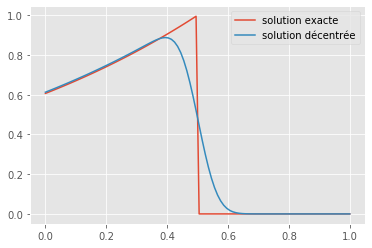

In [20]:
import numpy as np                  # librairie numpy
import matplotlib.pyplot as plt     # librairie matplotlib
plt.style.use('ggplot')             # optionnel : plus jolis graphes (c'est subjectif !)

def u_Left_Boundary(t):
    ## cette fonction retourne la valeur de la condition aux limites à gauche en fonction de t
    return np.exp(-t)

def u_exact( x, t ):
    ## cette fonction retourne la solution exacte en fonction de x et t
    return np.exp(-t + x) * ( x < t )

def compute_G( nx, t ):
    ## cette fonction retourne le vecteur G, en fonction de nx et du temps
    G = np.zeros(nx)
    G[0] = 1
    return np.exp(-t) * G

def compute_A_upwind(nx):
    ## cette fonction retourne la matrice A_u (on pourra utiliser la fonction np.diag ou np.eye)
    A_diag = np.ones(nx)
    A_subdiag = -1 * np.ones(nx -1)
    
    A = np.diag( A_diag, k=0) + np.diag(A_subdiag, k= -1)
    return A

def update_upwind( u, A_u, G, beta ):
    ## cette fonction retourne la mise à jour en temps du vecteur u par le schéma décentré
    u = u - beta * np.dot(A_u, u) + beta * G
    return u

L =    1         # taille du domaine
nx =   100         # nombre de points
dx =    L/nx        # taille du pas d'espace
x =  np.linspace(0,1,nx)           # points de discrétisation

c =     1        # vitesse dans l'équation de transport
t =      0       # temps initial
t_end =  0.5       # temps final

CFL =   0.5          # coefficient CFL (coefficient que multiplie dt)
dt = CFL * dx / c   # pas de temps
beta =   c* dt/dx           # valeur du paramètre β

u_upwind = np.zeros(nx)  # condition initiale
A_u =   compute_A_upwind(nx)            # matrice pour le schéma décentré amont (calculée avec la fonction compute_A_upwind)

while t < t_end:
    ## boucle en temps : on fait évoluer la valeur de u_upwind en utilisant update_upwind
    u_upwind = update_upwind( u_upwind, A_u, compute_G( nx, t ), beta )
    t = t + dt

# pas besoin de modifier le code ci-dessous, il sert simplement à afficher les résultats
plt.plot( x, u_exact( x, t_end ), label="solution exacte" )   # on affiche la solution exacte
plt.plot( x, u_upwind, label="solution décentrée" )           # on affiche la solution du schéma décentré
plt.legend();                                                 # on affiche la légende

**Question 5.**  Vérifier numériquement la convergence du schéma. On tracera en échelle logarithmique l'erreur (en normes $L^1$ et $L^2$) entre la solution exacte et la solution approchée, et ce pour diverses finesses du maillage.

L'erreur en norme $L^p$ est définie comme suit, pour $p \geq 1$ :
\begin{equation*}
    e_p = \left( \sum_{i=1}^N \, \Delta x \, \Big| u_i^n - u_{ex}(x_i,t^n) \Big|^p \right)^{\frac 1 p}.
\end{equation*}

schéma d'ordre 0.51 en erreur L1
schéma d'ordre 0.25 en erreur L2


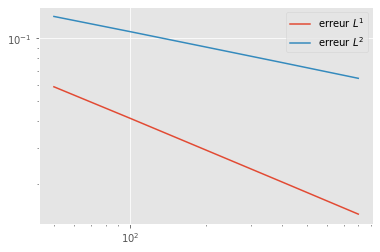

In [29]:
import numpy.linalg as npl
all_nx = 50 * 2**np.arange(5)           # toutes les finesses de maillage à tester (50, 100, 200, 400, 800)
errors_L1 = np.zeros(len(all_nx))       # vecteur qui contiendra toutes les erreurs L1
errors_L2 = np.zeros(len(all_nx))       # vecteur qui contiendra toutes les erreurs L2

for i_nx, nx in enumerate(all_nx):
    ## on parcourt la liste all_nx: i_nx est l'indice (0, 1, ...) et nx prend les valeurs qui sont dans all_nx

    dx =  1/nx      # taille du pas d'espace
    x =  np.linspace(0,1,nx)       # points de discrétisation

    t =    0              # temps initial
    CFL =   0.5             # coefficient CFL
    dt = CFL * dx / c    # pas de temps
    beta =  c*dt/dx             # valeur du paramètre β

    u_upwind =  np.zeros(nx)       # condition initiale
    A_u =  compute_A_upwind(nx)     # matrice pour le schéma décentré amont (calculée avec la fonction compute_A_upwind)

    while t < t_end:
        ## boucle en temps : on fait évoluer la valeur de u_upwind en utilisant update_upwind
        u_upwind = update_upwind( u_upwind, A_u, compute_G( nx, t ), beta )
        t = t + dt

    errors_L1[i_nx] = dx * npl.norm(u_upwind - u_exact( x, t ), 1)      # erreur en norme L1 entre la solution approchée et la solution exacte
    errors_L2[i_nx] = np.sqrt(dx) * npl.norm(u_upwind - u_exact( x, t ))      # erreur en norme L2 entre la solution approchée et la solution exacte

# pas besoin de modifier le code ci-dessous, il sert simplement à afficher les résultats : graphes et ordre de convergence
plt.loglog( all_nx, errors_L1, label="erreur $L^1$")          # erreurs en norme L1
plt.loglog( all_nx, errors_L2, label="erreur $L^2$")          # erreurs en norme L2
plt.legend();                                                 # on affiche la légende

print( "schéma d'ordre {0:4.2f} en erreur L1".format( -np.polyfit( np.log(all_nx), np.log(errors_L1), 1 )[0] ) )    # ordre de convergence en norme L1
print( "schéma d'ordre {0:4.2f} en erreur L2".format( -np.polyfit( np.log(all_nx), np.log(errors_L2), 1 )[0] ) )    # ordre de convergence en norme L2


**Question 6.** À partir de développements de Taylor sur $(\ast)$, écrire le schéma aux différences finies _centré_ permettant d'approcher les solutions du problème $(\ast)$. Avec $N$ points de discrétisation, on notera la solution approchée $u_i^n \simeq u( i \Delta x, n \Delta t )$, où $\Delta x = \frac L N$. 

En posant $\beta = c \dfrac{\Delta t}{\Delta x}$ et $U^n = (u_i^n)_{1 \leq i \leq N}$, on exprimera le schéma sous la forme vectorielle suivante :
$$
    U^{n+1} = U^n - \frac{\beta}{2} A_c U^n + \frac{\beta}{2} G^n,
    \quad \text{où} \quad
    A_c = \begin{pmatrix} 0      & 1      & 0      & \dots  & 0 \\
                          -1     & 0      & 1      & \dots  & 0 \\
                          \vdots & \ddots & \ddots & \ddots & \vdots \\
                          0      & \dots  & -1     & 0      & 1 \\
                          0      & \dots  & 0      & -1     & 1 \end{pmatrix}
    \quad \text{et} \quad
    G^n = e^{-n \Delta t} \begin{pmatrix} 1 \\ 0 \\ \vdots \\ 0 \end{pmatrix}.
$$

_Indication_ : penser à la condition aux limites à droite.

Implémenter le schéma, puis discuter de sa stabilité en fonction de la condition CFL.

**Réponse 6.** Soit $f$ une fonction de classe $C^1$ sur $\mathbb{R}$. Soient $x$ et $\Delta x \in \mathbb{R}$. La formule de Taylor-Young s'écrit de la manière suivante :
$$
\begin{cases}
\begin{align}
f(x-\Delta x) &= f(x) - \Delta {x}f^{'}(x) + O(\Delta x^2) \\
f(x+ \Delta x) &= f(x) + \Delta xf'(x) + O(\Delta x^2).
\end{align}
\end{cases}
$$

Soustrayons les deux équations. On obtient :
$$
f(x+ \Delta x) - f(x-\Delta x) = 2 \Delta x f'(x) + O(\Delta x^2).
$$

Ainsi : 
$
f'(x) = \frac{f(x+ \Delta x) - f(x-\Delta x)}{2 \Delta x} + O(\Delta x).
$

Dans le cas de l'équation de transport, le schéma centré aux différences finies s'écrit donc :

$$
\frac{u_i^{n+1} - u_i^n}{\Delta t} + c \frac{f(x+ \Delta x) - f(x-\Delta x)}{2 \Delta x} = 0
$$
où $i = 1,...,N$.

Pour $i = 1, ..., N$


Le schéma est inconditionnellemnt instable. En revanche, si on diminue la condition CFL, le graphe oscille un peu moins.


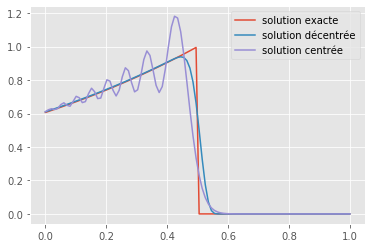

In [7]:
def compute_A_centred(nx):
    ## cette fonction retourne la matrice A_c (on pourra utiliser la fonction np.diag ou np.eye)
    A_supdiag = np.ones(nx-1)
    A_subdiag = -1 * np.ones(nx-1)
    A = np.diag(A_subdiag, k= -1) + np.diag(A_supdiag, k=1)
    return A

def update_centred( u, A_c, G, beta ):
    ## cette fonction retourne la mise à jour en temps du vecteur u par le schéma centré
    u = u - beta/2 * np.dot(A_c,u) + beta/2 *G
    return u

L =     1        # taille du domaine
nx =     100       # nombre de points
dx =   L/nx         # taille du pas d'espace
x =    np.linspace(0,1,nx)         # points de discrétisation

c =   1          # vitesse dans l'équation de transport
t =   0          # temps initial
t_end =   0.5      # temps final

CFL =  1/2000           # coefficient CFL (coefficient que multiplie dt)
dt = CFL * dx / c   # pas de temps
beta =  c*dt/dx            # valeur du paramètre β

u_centred = np.zeros(nx)        # condition initiale 
A_c = compute_A_centred(nx)              # matrice pour le schéma centré (calculée avec la fonction compute_A_centred)

while t < t_end:
    ## boucle en temps : on fait évoluer la valeur de u_centred en utilisant update_centred
    u_centred = update_centred(u_centred, A_c, compute_G( nx, t ), beta)
    t = t + dt

# pas besoin de modifier le code ci-dessous, il sert simplement à afficher les résultats
plt.plot( x, u_exact( x, t_end ), label="solution exacte" )   # on affiche la solution exacte
plt.plot( x, u_upwind, label="solution décentrée" )           # on affiche la solution du schéma décentré
plt.plot( x, u_centred, label="solution centrée" )            # on affiche la solution du schéma centré
plt.legend();                                                 # on affiche la légende

**Question 7.**  Écrire le schéma aux différences finies de Lax-Wendroff permettant d'approcher les solutions du problème $(\ast)$. Avec $N$ points de discrétisation, on notera la solution approchée $u_i^n \simeq u( i \Delta x, n \Delta t )$, où $\Delta x = \frac L N$. 

En posant $\beta = c \dfrac{\Delta t}{\Delta x}$ et $U^n = (u_i^n)_{1 \leq i \leq N}$, on exprimera le schéma sous la forme vectorielle suivante :
$$
    U^{n+1} = U^n - \frac{\beta}{2} A_{LW} U^n + \frac{\beta}{2} (\beta + 1) G^n,
    \quad \text{où} \quad
    A_{LW}(\beta) = \begin{pmatrix} 2 \beta     & - \beta + 1 & 0           & \dots       & 0 \\
                                    - \beta - 1 & 2 \beta     & - \beta + 1 & \dots       & 0 \\
                                         \vdots & \ddots      & \ddots      & \ddots      & \vdots \\
                                         0      & \dots       & - \beta - 1 & 2 \beta     & - \beta + 1 \\
                                         0      & \dots       & 0           & - \beta - 1 & \beta + 1 \end{pmatrix}
    \quad \text{et} \quad
    G^n = e^{-n \Delta t} \begin{pmatrix} 1 \\ 0 \\ \vdots \\ 0 \end{pmatrix}.
$$

_Indication_ : penser à la condition aux limites à droite.

Implémenter le schéma, puis discuter de sa stabilité en fonction de la condition CFL.

**Réponse 7.**

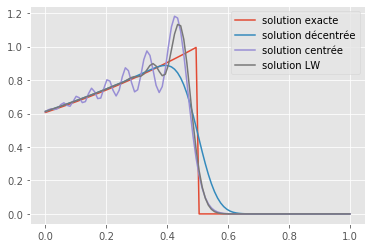

In [22]:
import numpy as np

def compute_A_LW( nx, beta ):
    ## cette fonction retourne la matrice A_LW (on pourra utiliser la fonction np.diag ou np.eye)
    A_diag = 2*beta* np.ones(nx)
    A_subdiag = (- beta - 1)*np.ones(nx-1)
    A_supdiag = (- beta + 1)*np.ones(nx-1)
    A = np.diag(A_diag, k=0) + np.diag(A_subdiag, k=-1) + np.diag(A_supdiag, k=1)
    A[nx-1, nx-1] =  beta + 1
    return A

def update_LW( u, A_LW, G, beta ):
    ## cette fonction retourne la mise à jour en temps du vecteur u par le schéma de Lax-Wendroff
    u1 = u - (beta/2)*np.dot(A_LW,u) + (beta/2)*(beta+1)*G
    return u1

L =  1           # taille du domaine
nx =  100          # nombre de points
dx =   L/nx         # taille du pas d'espace
x =    np.linspace(0, 1, nx)         # points de discrétisation

c =     1        # vitesse dans l'équation de transport
t =      0       # temps initial
t_end =   0.5      # temps final

CFL =  0.5             # coefficient CFL (coefficient que multiplie dt)
dt = CFL * dx / c   # pas de temps
beta =    c * dt/ dx          # valeur du paramètre β

u_LW =  np.zeros(nx)        # condition initiale 
A_LW =  compute_A_LW(nx, beta)        # matrice pour le schéma de Lax-Wendroff (calculée avec la fonction compute_A_LW)

while t < t_end:
    ## boucle en temps : on fait évoluer la valeur de u_LW en utilisant update_LW
    u_LW = update_LW(u_LW, A_LW, compute_G(nx, t), beta)
    t = t + dt

# pas besoin de modifier le code ci-dessous, il sert simplement à afficher les résultats
plt.plot( x, u_exact( x, t_end ), label="solution exacte" )   # on affiche la solution exacte
plt.plot( x, u_upwind, label="solution décentrée" )           # on affiche la solution du schéma décentré
plt.plot( x, u_centred, label="solution centrée" )            # on affiche la solution du schéma centré
plt.plot( x, u_LW, label="solution LW" )                      # on affiche la solution du schéma de Lax-Wendroff
plt.legend();                                                 # on affiche la légende

**Question 8. (Bonus)** Reprendre les questions **4.**, **6.** et **7.** en utilisant des matrices creuses. Comparer les temps de calcul par rapport à l'utilisation de matrices pleines.

  full matrix, upwind scheme: 3.851944 seconds
sparse matrix, upwind scheme: 0.044958 seconds


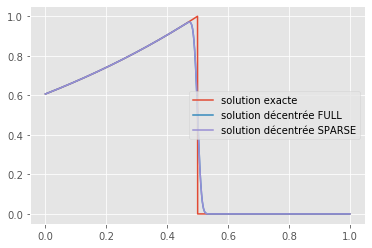

In [34]:
import time                     # librairie pour mesurer le temps de calcul
import scipy.sparse as sps      # librairie pour gérer les matrices creuses ("sparse matrices")
import matplotlib.pyplot as plt     # librairie matplotlib
plt.style.use('ggplot')             # optionnel : plus jolis graphes (c'est subjectif !)

# 1) Avec des matrices creuses

def compute_A_upwind_sparse(nx):
    ## cette fonction retourne la matrice A_u (on pourra utiliser la fonction np.diag ou np.eye)
    A_diag_sparse = np.ones(nx)
    A_subdiag_sparse = -1 * np.ones(nx -1)
    
    A_sparse = sps.diags( [ A_subdiag_sparse,  A_diag_sparse ], [ -1, 0 ], format="csc" )
    return A_sparse

def update_upwind_sparse( u, A_u, G, beta ):
    ## cette fonction retourne la mise à jour en temps du vecteur u par le schéma décentré
    u1 = u - beta * A_sparse.dot(u)
    u1[0] = u1[0] + beta * G[0]
    return u1

L =    1         # taille du domaine
nx =   2500         # nombre de points
dx =    L/nx        # taille du pas d'espace
x =  np.linspace(0,1,nx)           # points de discrétisation

c =     1        # vitesse dans l'équation de transport
t =      0       # temps initial
t_end =  0.5       # temps final

CFL =   0.5          # coefficient CFL (coefficient que multiplie dt)
dt = CFL * dx / c   # pas de temps
beta =   c* dt/dx           # valeur du paramètre β

A_u = compute_A_upwind(nx)
A_sparse = compute_A_upwind_sparse(nx)

t = 0
u_upwind_sparse = np.zeros(nx)


start_sparse = time.time()        # donne le temps CPU avant les itérations en temps
while t < t_end:
    ## boucle en temps : on part de u = u0, et on fait évoluer la valeur de u en utilisant update_explicit_sparse
    u_upwind_sparse = update_upwind_sparse( u_upwind_sparse, A_sparse, compute_G(nx, t), beta)
    t = t + dt
end_sparse = time.time()          # donne le temps CPU après les itérations en temps

# 2) Avec des matrices pleines

t = 0 
u_upwind = np.zeros(nx)

start_full = time.time()
while t < t_end:
    ## boucle en temps : on fait évoluer la valeur de u_upwind en utilisant update_upwind
    u_upwind = update_upwind( u_upwind, A_u, compute_G( nx, t ), beta )
    t = t + dt
end_full = time.time()

# On affiche les solutions

plt.plot( x, u_exact( x, t_end ), label="solution exacte" )        # on affiche la solution exacte
plt.plot( x, u_upwind, label="solution décentrée FULL" )           # on affiche la solution du schéma décentré
plt.plot( x, u_upwind_sparse, label="solution décentrée SPARSE" )  # on affiche la solution décentrée pour les matrices creuses
plt.legend()

## 3) comparaison des temps de calcul

print( "  full matrix, upwind scheme: {0:8.6f} seconds".format( end_full - start_full ) )
print( "sparse matrix, upwind scheme: {0:8.6f} seconds".format( end_sparse - start_sparse ) )

In [ ]:
import time                     # librairie pour mesurer le temps de calcul


